In [1]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

# Study of the Wiener Process

In [2]:
def simulate_wiener_process(T:float=1, N:int=1_000)->np.ndarray:
    """
    Simulates a standard Wiener process (Brownian Motion).
    """
    dt = T / N
    t = np.linspace(0, T, N)

    dW = np.sqrt(dt) * np.random.normal(size=N)
#     dW = np.random.normal(mu*dt, sigma*np.sqrt(dt), N)

    W = np.cumsum(dW)
    # Prepend the initial value W(0) = 0
    W = np.insert(W, 0, 0)
    return t, W[:-1] # After insert 0 as first element array length is N+1


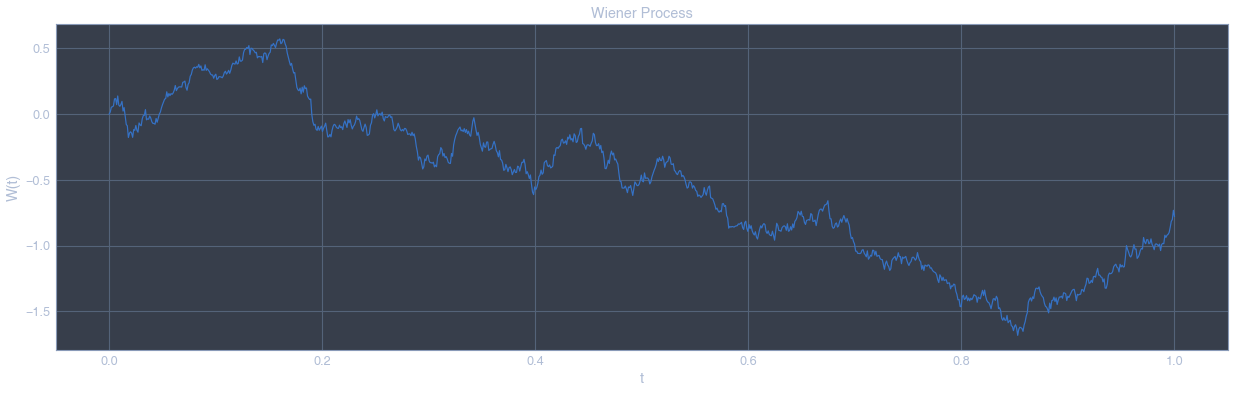

In [44]:
t, W = simulate_wiener_process()

plt.figure(figsize=(21, 6))
plt.plot(t, W)
plt.title('Wiener Process')
plt.xlabel('t')
plt.ylabel('W(t)');

In [13]:
means = []
stds = []
for _ in range(1_000):
    t, W = simulate_wiener_process()
    means.append(np.mean(W))
    stds.append(np.std(W))
    
np.mean(means), np.std(stds)

(0.03491672267143795, 0.15009699201974794)

Text(0.5, 1.0, 'STDs distribution')

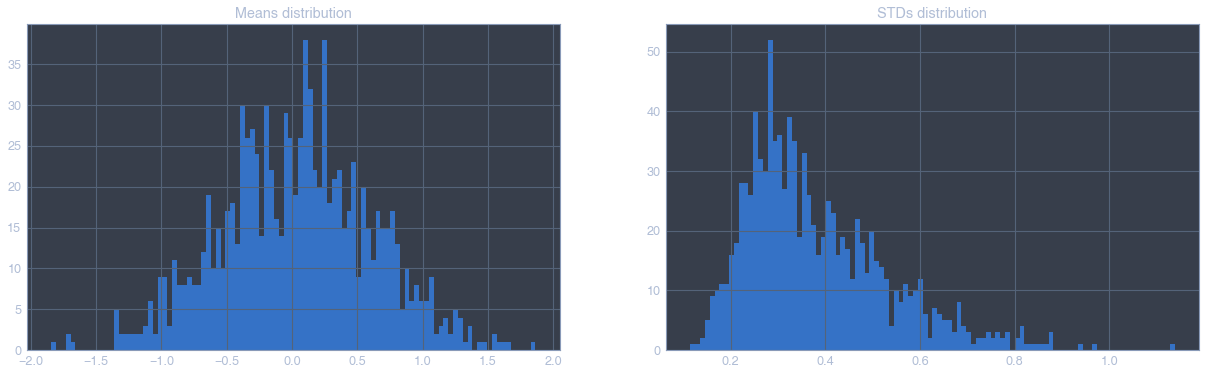

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(21, 6))
ax[0].hist(means, bins=100)
ax[0].set_title('Means distribution')
ax[1].hist(stds, bins=100)
ax[1].set_title('STDs distribution')

p-value: 0.768


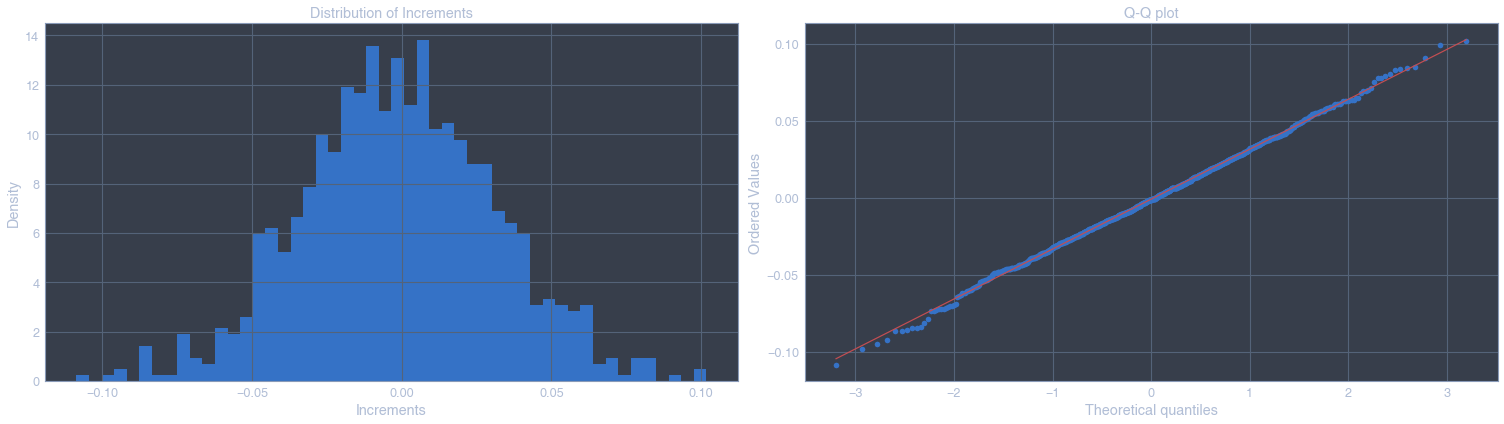

In [10]:
t, W = simulate_wiener_process()
increments = np.diff(W)

k2, p_value = stats.normaltest(increments)
print(f'p-value: {p_value:.3f}')

fig, ax = plt.subplots(1, 2, figsize=(21, 6))
ax[0].hist(increments, bins=50, density=True)
ax[0].set_title('Distribution of Increments')
ax[0].set_xlabel('Increments')
ax[0].set_ylabel('Density')

stats.probplot(increments, dist='norm', plot=ax[1])
ax[1].set_title('Q-Q plot')

fig.tight_layout()

Text(0.5, 1.0, 'P-values distribution')

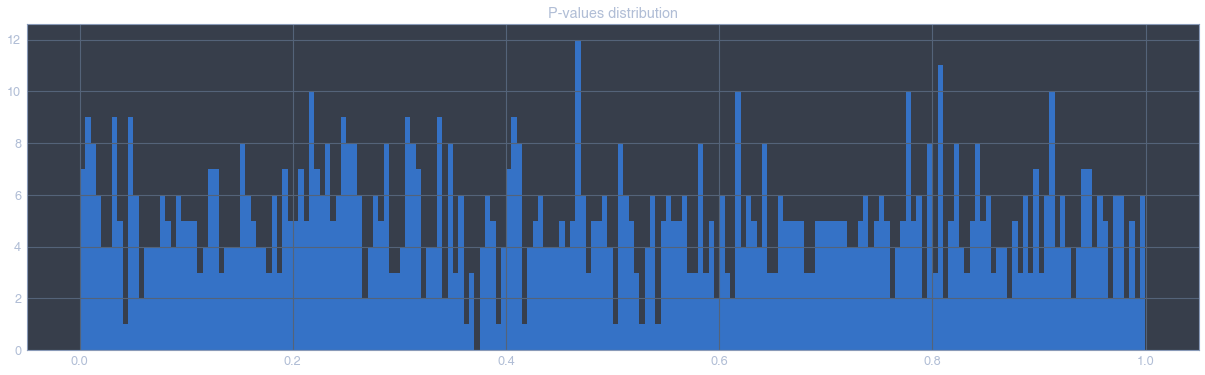

In [15]:
p_vals = []
for _ in range(1_000):
    t, W = simulate_wiener_process()
    increments = np.diff(W)
    _, p_value = stats.normaltest(increments)
    p_vals.append(p_value)

plt.figure(figsize=(21, 6))
plt.hist(p_vals, bins=200)
plt.title('P-values distribution')